In [1]:
import numpy as np
import pandas as pd
import h5py 

In [2]:
def h5py_dataset_iterator(g, prefix=''):
    for key in g.keys():
        item = g[key]
        path = '{}/{}'.format(prefix, key)
        if isinstance(item, h5py.Dataset): # test for dataset
            yield (path, item)
        elif isinstance(item, h5py.Group): # test for group (go down)
            yield from h5py_dataset_iterator(item, path)

In [3]:
filename = 'rollingheavy_C150.h5'

In [4]:
with h5py.File(filename, 'r') as f:
    for (path, dset) in h5py_dataset_iterator(f):
        print(path, dset)

/df_with_missing/_i_table/index/abounds <HDF5 dataset "abounds": shape (0,), type "<i8">
/df_with_missing/_i_table/index/bounds <HDF5 dataset "bounds": shape (0, 127), type "<i8">
/df_with_missing/_i_table/index/indices <HDF5 dataset "indices": shape (0, 131072), type "<u4">
/df_with_missing/_i_table/index/indicesLR <HDF5 dataset "indicesLR": shape (131072,), type "<u4">
/df_with_missing/_i_table/index/mbounds <HDF5 dataset "mbounds": shape (0,), type "<i8">
/df_with_missing/_i_table/index/mranges <HDF5 dataset "mranges": shape (0,), type "<i8">
/df_with_missing/_i_table/index/ranges <HDF5 dataset "ranges": shape (0, 2), type "<i8">
/df_with_missing/_i_table/index/sorted <HDF5 dataset "sorted": shape (0, 131072), type "<i8">
/df_with_missing/_i_table/index/sortedLR <HDF5 dataset "sortedLR": shape (131201,), type "<i8">
/df_with_missing/_i_table/index/zbounds <HDF5 dataset "zbounds": shape (0,), type "<i8">
/df_with_missing/table <HDF5 dataset "table": shape (198,), type "|V392">


In [5]:
hf = h5py.File(filename, 'r')

In [6]:
data = hf.get('df_with_missing/table')
data

<HDF5 dataset "table": shape (198,), type "|V392">

In [7]:
k = pd.DataFrame(list(data.attrs.keys()), columns=['key'])
v = pd.DataFrame(list(data.attrs.values()), columns=['values'])
pd.merge(k, v, left_index=True, right_index=True)

,key,values
0,CLASS,b'TABLE'
1,FIELD_0_FILL,0
2,FIELD_0_NAME,b'index'
3,FIELD_1_FILL,0.0
4,FIELD_1_NAME,b'values_block_0'
5,NROWS,198
6,TITLE,Empty(dtype=dtype('S1'))
7,VERSION,b'2.7'
8,index_kind,b'integer'
9,values_block_0_dtype,b'float64'


In [8]:
df = pd.DataFrame(data)
df

,0
0,"[0, [426.22515869140625, 2.9404337406158447, 0..."
1,"[1, [428.449951171875, 4.490979194641113, 0.00..."
2,"[2, [1887.46630859375, 1089.858642578125, 0.00..."
3,"[3, [1887.11572265625, 1089.8782958984375, 0.0..."
4,"[4, [1887.329833984375, 1089.8172607421875, 0...."
...,...
193,"[193, [1886.7138671875, 1090.25341796875, 0.00..."
194,"[194, [1887.225830078125, 1089.9967041015625, ..."
195,"[195, [1887.310791015625, 1089.97607421875, 0...."
196,"[196, [1887.538818359375, 1089.8704833984375, ..."


In [9]:
# data in the first frame
f0 = df[0][0][1]
f0

array([ 4.26225159e+02,  2.94043374e+00,  1.79755688e-03,  4.28156281e+02,
        6.12118244e-01,  8.42303038e-04,  4.26483643e+02,  4.29972410e-01,
        1.63471699e-03,  4.29545593e+02,  2.26158190e+00,  1.42848492e-03,
        4.25076813e+02,  1.93477154e-01,  7.30603933e-04,  4.19781891e+02,
       -1.87094545e+00,  1.77261233e-03,  4.25320679e+02,  2.28605080e+00,
        6.52551651e-04,  4.21993530e+02, -6.83369255e+00,  2.44495273e-03,
        4.19406464e+02, -6.64537907e-01,  1.36819482e-03,  4.20586395e+01,
        6.19963318e+02,  8.72224569e-04,  4.20924713e+02,  4.22006226e+00,
        1.06009841e-03,  4.28896790e+02, -7.48608112e-01,  4.01735306e-04,
        4.32782043e+02,  7.14711666e-01,  7.16835260e-04,  4.25571350e+02,
        2.36697173e+00,  4.95225191e-04,  4.25703400e+02,  1.67923188e+00,
        9.59634781e-04,  4.29528900e+02, -3.69115257e+00,  9.98312235e-03])

In [10]:
f0.shape

(48,)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

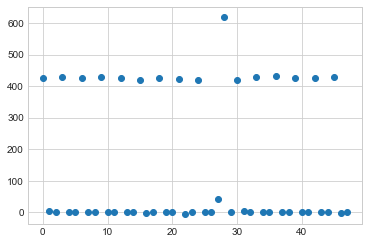

In [12]:
plt.plot(f0, 'o');

In [13]:
# plot trajectory of all body parts

x_plot = pd.DataFrame([])
for i in range(df.shape[0]):
    for j in range(16):
        x_plot = x_plot.append(pd.Series(df[0][i][1][0+3*j]), ignore_index=True)
x_plot.columns = ['x_values']

y_plot = pd.DataFrame([])
for i in range(df.shape[0]):
    for j in range(16):
        y_plot = y_plot.append(pd.Series(df[0][i][1][1+3*j]), ignore_index=True)
y_plot.columns = ['y_values']

plot = pd.merge(x_plot, y_plot, left_index=True, right_index=True)

In [14]:
plot

,x_values,y_values
0,426.225159,2.940434
1,428.156281,0.612118
2,426.483643,0.429972
3,429.545593,2.261582
4,425.076813,0.193477
...,...,...
3163,1888.246460,1086.673828
3164,1885.903809,1090.103394
3165,1884.691895,1087.705322
3166,1885.492554,1089.784302


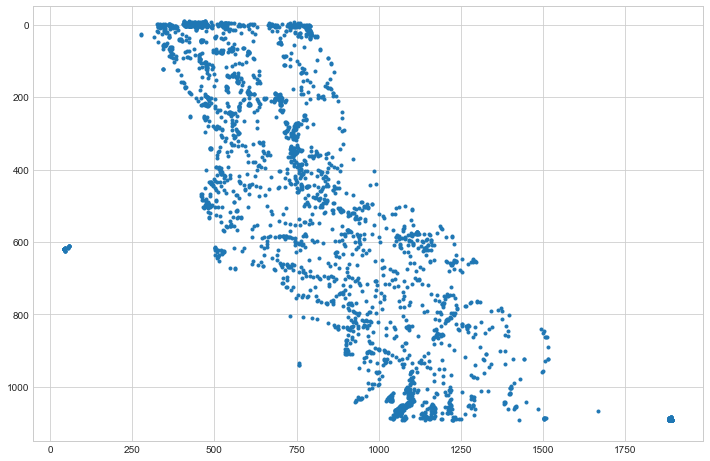

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(plot['x_values'], plot['y_values'], s=9)
plt.ylim(1150,-50);